In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


       finding missing data

In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
177/891*100

19.865319865319865

In [12]:
df['adult_male']

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: adult_male, Length: 891, dtype: bool

In [14]:
df[['alive', 'survived']]

,alive,survived
0,no,0
1,yes,1
2,yes,1
3,yes,1
4,no,0
...,...,...
886,no,0
887,yes,1
888,no,0
889,yes,1


In [15]:
titanic = df[['survived', 'sex', 'age', 'pclass', 'fare', 'alone', 'parch', 'embark_town']].copy()
titanic

,survived,sex,age,pclass,fare,alone,parch,embark_town
0,0,male,22.0,3,7.2500,False,0,Southampton
1,1,female,38.0,1,71.2833,False,0,Cherbourg
2,1,female,26.0,3,7.9250,True,0,Southampton
3,1,female,35.0,1,53.1000,False,0,Southampton
4,0,male,35.0,3,8.0500,True,0,Southampton
...,...,...,...,...,...,...,...,...
886,0,male,27.0,2,13.0000,True,0,Southampton
887,1,female,19.0,1,30.0000,True,0,Southampton
888,0,female,NaN,3,23.4500,False,2,Southampton
889,1,male,26.0,1,30.0000,True,0,Cherbourg


In [17]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [18]:
titanic['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

<Axes: ylabel='embark_town'>

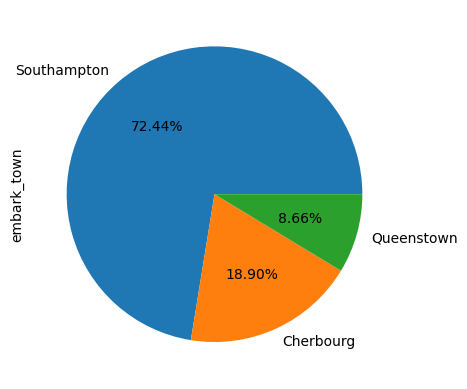

In [22]:
titanic['embark_town'].value_counts().plot(kind='pie', autopct='%.2f%%')

      -fill missing data
      -numerical column
      -catgorical column

In [24]:
avg_age = round(titanic['age'].mean())
print(avg_age)

30


In [25]:
titanic['age'].fillna(avg_age, inplace=True)

In [26]:
mosr_common_town = titanic['embark_town'].value_counts().idxmax()
print(mosr_common_town)

Southampton


In [27]:
titanic['embark_town'].fillna(mosr_common_town, inplace=True)

In [28]:
titanic.isnull().sum()

survived       0
sex            0
age            0
pclass         0
fare           0
alone          0
parch          0
embark_town    0
dtype: int64

In [30]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [31]:
df.isnull().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [35]:
penguins= df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']].copy()
penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,Male
1,39.5,17.4,186.0,3800.0,Female
2,40.3,18.0,195.0,3250.0,Female
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,Female
341,50.4,15.7,222.0,5750.0,Male
342,45.2,14.8,212.0,5200.0,Female


<Axes: ylabel='body_mass_g'>

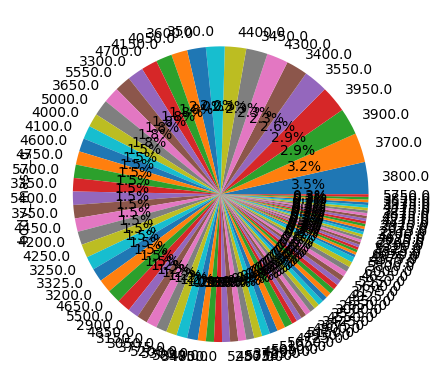

In [37]:
penguins['body_mass_g'].value_counts().plot(kind='pie', autopct='%.1f%%')


In [39]:
penguins['bill_length_mm'].value_counts()


41.1    7
45.2    6
39.6    5
50.5    5
50.0    5
       ..
35.6    1
36.8    1
43.1    1
38.5    1
49.9    1
Name: bill_length_mm, Length: 164, dtype: int64

In [40]:
penguins['body_mass_g'].value_counts()


3800.0    12
3700.0    11
3900.0    10
3950.0    10
3550.0     9
          ..
4475.0     1
3975.0     1
3575.0     1
3850.0     1
5750.0     1
Name: body_mass_g, Length: 94, dtype: int64

<Axes: ylabel='body_mass_g'>

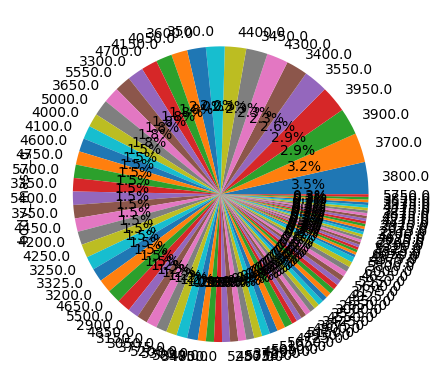

In [41]:
penguins['body_mass_g'].value_counts().plot(kind='pie', autopct='%.1f%%')
